In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('data.xlsx')
age_map = {'<=30':1,'[31,40]':2,'>40':3}
data['Age'] = data.Age.str.strip().map(age_map)
imcome_map = {'high':3,'medium':2,'low':1}
data['Incoming'] = data.Incoming.str.strip().map(imcome_map)
data = pd.concat([data,pd.get_dummies(data.Student)],axis = 1)
data = data.drop('Student',axis = 1)

In [3]:
data

,User id,Age,Incoming,Credit Rating,Buying,no,yes
0,1,1,3,fair,no,1,0
1,2,1,3,excellent,no,1,0
2,3,2,3,fair,yes,1,0
3,4,3,2,fair,yes,1,0
4,5,3,1,fair,yes,0,1
5,6,3,1,excellent,no,0,1
6,7,2,1,excellent,yes,0,1
7,8,1,2,fair,no,1,0
8,9,1,1,fair,yes,0,1
9,10,3,2,fair,yes,0,1


In [4]:
CreditRating_map = {'fair':0,'excellent':1}
data['Credit_Rating'] = data['Credit Rating'].str.strip().map(CreditRating_map)


In [5]:

data = data.drop('Credit Rating',axis=1)
label_map = {'yes':1,'no':0}
data['Buying'] = data['Buying'].str.strip().map(label_map)
data

,User id,Age,Incoming,Buying,no,yes,Credit_Rating
0,1,1,3,0,1,0,0
1,2,1,3,0,1,0,1
2,3,2,3,1,1,0,0
3,4,3,2,1,1,0,0
4,5,3,1,1,0,1,0
5,6,3,1,0,0,1,1
6,7,2,1,1,0,1,1
7,8,1,2,0,1,0,0
8,9,1,1,1,0,1,0
9,10,3,2,1,0,1,0


In [6]:
data = data.drop('User id',1)

C:\Users\施梦娴\AppData\Local\Temp\ipykernel_21312\2167197632.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('User id',1)


In [7]:
data

,Age,Incoming,Buying,no,yes,Credit_Rating
0,1,3,0,1,0,0
1,1,3,0,1,0,1
2,2,3,1,1,0,0
3,3,2,1,1,0,0
4,3,1,1,0,1,0
5,3,1,0,0,1,1
6,2,1,1,0,1,1
7,1,2,0,1,0,0
8,1,1,1,0,1,0
9,3,2,1,0,1,0


In [8]:
from sklearn import tree

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [22]:
x = data.drop('Buying',1)
y = data['Buying']
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)


C:\Users\施梦娴\AppData\Local\Temp\ipykernel_21312\692507886.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = data.drop('Buying',1)


In [24]:
# 样本不均衡
y.value_counts()

1    9
0    4
Name: Buying, dtype: int64

In [26]:
# 分层抽样
from sklearn.model_selection import StratifiedShuffleSplit
splt = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=1)
for train_idx, test_idx in splt.split(data, y): # 按照后者分层抽样
    train = data.iloc[train_idx]
    test = data.iloc[test_idx]
# 查看分布
print(train['Buying'].value_counts()/len(train))
print(test['Buying'].value_counts()/len(test))

1    0.666667
0    0.333333
Name: Buying, dtype: float64
1    0.75
0    0.25
Name: Buying, dtype: float64


In [29]:
train

,Age,Incoming,Buying,no,yes,Credit_Rating
3,3,2,1,1,0,0
8,1,1,1,0,1,0
4,3,1,1,0,1,0
7,1,2,0,1,0,0
10,1,2,1,0,1,1
6,2,1,1,0,1,1
0,1,3,0,1,0,0
5,3,1,0,0,1,1
12,2,3,1,0,1,0


In [30]:
test

,Age,Incoming,Buying,no,yes,Credit_Rating
11,2,2,1,1,0,1
9,3,2,1,0,1,0
2,2,3,1,1,0,0
1,1,3,0,1,0,1


In [31]:
x_train = train.drop('Buying',1)
x_test = test.drop('Buying',1)
y_train = train['Buying']
y_test = test['Buying']

C:\Users\施梦娴\AppData\Local\Temp\ipykernel_21312\1111643745.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train = train.drop('Buying',1)
C:\Users\施梦娴\AppData\Local\Temp\ipykernel_21312\1111643745.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_test = test.drop('Buying',1)


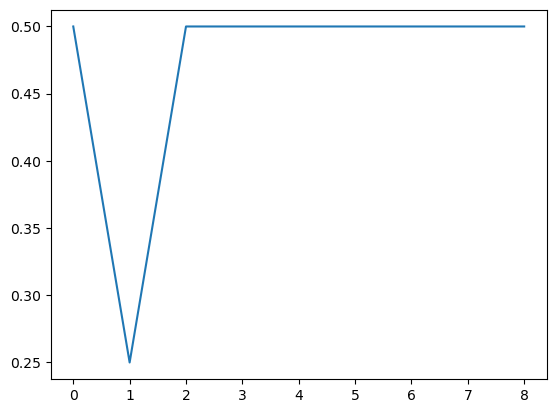

In [64]:
score = []
for i in range(1,10):
    clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=i).fit(x_train,y_train) #用训练集数据训练模型
    score.append(clf.score(x_test,y_test))

import matplotlib.pyplot as plt
plt.plot(score)

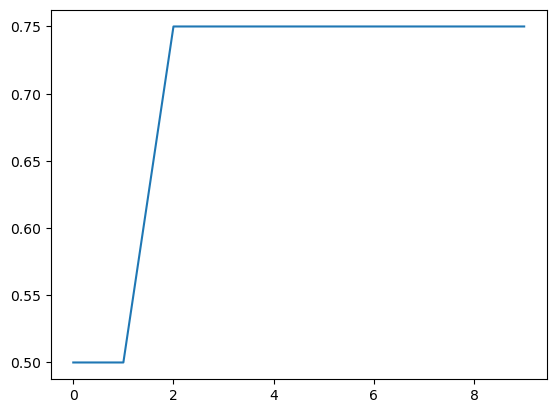

In [65]:
score = []
for i in np.arange(0,1,0.1):
    clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=3,min_impurity_decrease=i).fit(x_train,y_train) #用训练集数据训练模型
    score.append(clf.score(x_test,y_test))
import matplotlib.pyplot as plt
plt.plot(score)

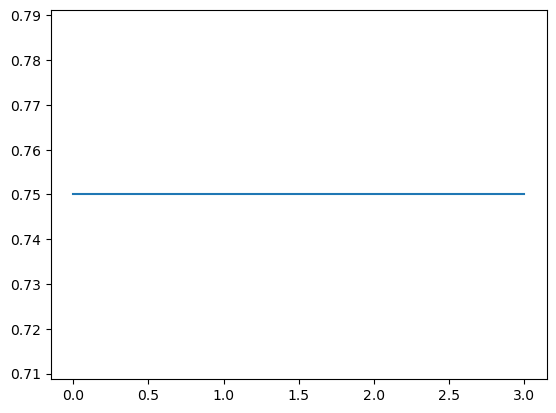

In [70]:
score = []
for i in range(1,5):
    clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=3,min_impurity_decrease=0.2,min_samples_leaf= i).fit(x_train,y_train) #用训练集数据训练模型
    score.append(clf.score(x_test,y_test))
import matplotlib.pyplot as plt
plt.plot(score)

In [43]:
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
X, y = load_digits(return_X_y = True)
param = {'max_depth':[1,2,3,4,5],
        'min_samples_leaf':[1,2,3,4,5],
        'criterion':['gini','entropy'],
        'min_impurity_decrease':[0.1,0.2,0.5]}
#n_jobs =-1使用全部CPU并行多线程搜索
gs = GridSearchCV(tree.DecisionTreeClassifier(), param, refit = True, cv = 5, verbose = 1)
gs.fit(x_train,y_train) #Run fit with all sets of parameters.
print('最优参数: ',gs.best_params_)
print('最佳性能: ', gs.best_score_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


最优参数:  {'criterion': 'gini', 'max_depth': 1, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 3}
最佳性能:  0.7


In [67]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, min_impurity_decrease=0.2) #实例化模型对象 #,min_impurity_decrease=0.1
clf = clf.fit(x_train,y_train) #用训练集数据训练模型
result = clf.score(x_test,y_test) #对我们训练的模型精度进行打分
print(result)

0.75


In [59]:
clf.predict(x_test)

array([0, 1, 0, 0], dtype=int64)

In [60]:
y_test

11    1
9     1
2     1
1     0
Name: Buying, dtype: int64

In [54]:
clf.predict(x_test)

array([0, 1, 0, 0], dtype=int64)

In [55]:
y_test

11    1
9     1
2     1
1     0
Name: Buying, dtype: int64

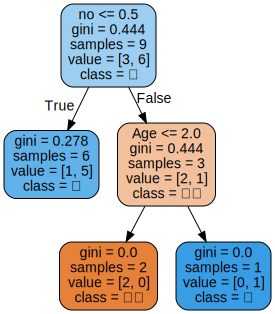

In [56]:
import graphviz
dot_data = tree.export_graphviz(clf #训练好的模型
                                ,out_file = None
                                ,feature_names= x.columns
                                ,class_names=["不买","买"]
                                ,filled=True #进行颜色填充
                                ,rounded=True #树节点的形状控制
)
graph = graphviz.Source(dot_data)
graph

In [57]:
x

,Age,Incoming,no,yes,Credit_Rating
0,1,3,1,0,0
1,1,3,1,0,1
2,2,3,1,0,0
3,3,2,1,0,0
4,3,1,0,1,0
5,3,1,0,1,1
6,2,1,0,1,1
7,1,2,1,0,0
8,1,1,0,1,0
9,3,2,0,1,0


In [58]:
# Age	Incoming	Buying	no	yes	Credit_Rating
print(x.columns)
x_pred = np.array([3,2,1,0,1]).reshape(1,-1)
clf.predict(x_pred)

Index(['Age', 'Incoming', 'no', 'yes', 'Credit_Rating'], dtype='object')


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)